# Overview of ML

We now know it is possible to analyze data with Python based on fundamental statistics using the Pandas library. This allows us to get insight into the data and answer basic questions. However, there are times when the patterns in the data are difficult to deduce manually and need an alogorithmic approach to learning what the pattern is.

When more complex patterns are needed to work with data, we now often times turn to machine learning to determine those patterns. Machine learning is something we've heard about a lot recently, but what is machine learning?

![ML encapsulated](https://miro.medium.com/v2/resize:fit:720/format:webp/1*aQJf4cz9_V25xIAMO1YwiA.png)

* Source: [Clarifying AI, Machine Learning, Deep Learning, Data Science with Venn Diagrams](https://lotuslabs.medium.com/clarifying-ai-machine-learning-deep-learning-data-science-with-venn-diagrams-c94198faa063)

Machine learning, as shown above, is a subsection of the broder field of AI. AI being a broader bucket for the field of research of having computer systems exhibit intelligence (you then fall down the rabbit hole of defining intelligence).

Specifically, ML is the field of research around developing AI based on learning patterns. The learning process generally being some iterative operation where some model (representation of the solution) is improved over time.

Since so much of the learning involves operations on data, Data Science also has a huge overlap with ML (A big part of the reason we covered Pandas previously). Often times the patterns being learned are fundamental data analysis operations being leveraged at scales we could not do manually.

The last part of this diagram worth noting is the inner circle "Deep Learning". Deep Learning is a subsection of ML where the learning is done via deep neural networks which are inspired by real neural networks in the brain.

## Definitions

Ok I've thrown around a lot of words and broad concepts, lets first clarify some definitions and see concrete examples.

| Phrase             | Definition                                                                   |
|--------------------|------------------------------------------------------------------------------|
| deep learning      | Machine learning involving multi-layer neural networks                       |
| gradient descent   | Optimization algorithm that works to minimize some loss function iteratively |
| learning algorithm | Method for training a model for a specific task                              |
| loss               | A measurement of how off a prediction is from the truth                      |
| model              | A representation of a possible solution to a problem                         |
| parameters         | The control values of the model (thing the $m$ and $b$ in $y = mx + b$)      |

# Stochastic Gradient Descent Regression

A common algorithm for trying to make sense of a data set is SGD Regression. Model that use SGD Regression work by finding a linear equation that can represent the general trend of data. Lets look at a basic example using [this vehicle dataset](https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data?resource=download)

In [23]:
import pandas as pd

# Read in the data
data = pd.read_csv('car_prices.csv')

data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


<AxesSubplot:xlabel='odometer', ylabel='sellingprice'>

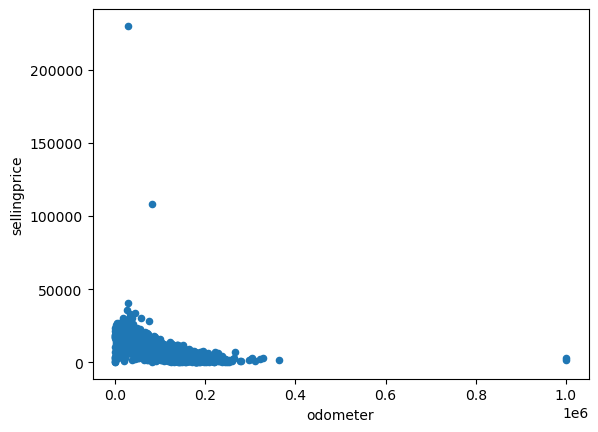

In [24]:
# Lets visualize the Odometer reading on the car based on what it was sold at
ford_data = data[(data['make'] == 'Ford') & (data['model'] == 'Escape')]
ford_data.plot.scatter(x='odometer', y='sellingprice')

We can see that there is a general linear trend taking place, there clearly is more factoring into the price other then the odometer reading. But for now, lets see if we can train a SGD regression model to determine the price of a car based on its odometer reading.

We will use the library Scikit Learn. This library is a Python library is a machine learing library well suited for getting a grasp of the basics. One of the built in features is the "SGDRegressor" model. The model "learns" the parameters of a linear equation by comparing its representation against how far off its representation is against the known values. The learning algorithm continues until its minimized the error between the linear representation and the data.

To train the model we will need to split our dataset into a "train" component which we use to update the model parameters and a "test" component we use to measure the models performance.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Get the test and train data
train, test = train, test = train_test_split(ford_data, test_size=0.2)

train_x = train['odometer'].to_numpy().reshape(-1, 1)
train_y = train['sellingprice'].to_numpy()

test_x = test['odometer'].to_numpy().reshape(-1, 1)
test_y = test['sellingprice'].to_numpy()

# Create the linear regression model
model = Pipeline(steps=[('scaling', StandardScaler()), ('model', linear_model.SGDRegressor(max_iter=1000, tol=1e-3))])

# Train the model on the train dataset
model.fit(train_x, train_y)

# Now lets see how the model performs on our test data
test_predictions = model.predict(test_x)
mean_error = mean_absolute_error(test_y, test_predictions)
percent_error = mean_absolute_percentage_error(test_y, test_predictions)

print('Coefficents: ', model['model'].coef_)
print('Bias: ', model['model'].intercept_)
print('Error: ', mean_error)
print('Percent Error: ', percent_error)

Coefficents:  [-4588.67202322]
Bias:  [13957.68474372]
Error:  2368.7843561722693
Percent Error:  0.3362667677725969


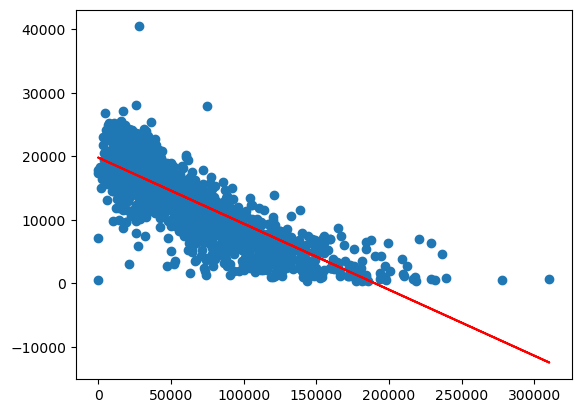

In [35]:
plt.scatter(test_x, test_y)
plt.plot(test_x, test_predictions, color="red")

SGD Regression doesn't have to stop at just 1 dimensional inputs. The power of SGD Regression, especially in the context of these learning libraries, is the ability to determine a model that fits a multi-dimensional space. Lets see if we can predict the cost of laptops from our previous work.

In [27]:
# Read in the data
laptops = pd.read_csv('laptops.csv')

# Add the USD column
rupees_to_usd = 0.012
laptops['Price'] = laptops['Price'].astype('float')
laptops['usd'] = laptops['Price'] * rupees_to_usd

laptops.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty,usd
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990.0,63,intel,core i3,2,4,8,...,0,intel,integrated,False,15.6,1920,1080,windows,1,287.88
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990.0,67,intel,core i7,4,8,16,...,0,intel,integrated,False,15.6,1920,1080,windows,1,431.88
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100.0,73,amd,ryzen 5,6,12,8,...,0,amd,dedicated,False,15.6,1920,1080,windows,1,613.20
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990.0,62,intel,core i5,12,16,8,...,0,intel,integrated,False,14.0,1920,1080,windows,1,479.88
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580.0,62,amd,ryzen 3,4,8,8,...,0,amd,integrated,False,15.6,1920,1080,windows,1,342.96


In [28]:
# Create the test/train split
train, test = train_test_split(laptops, test_size=0.2)

train_x = train[['num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity']]
train_y = train['usd']

test_x = test[['num_cores', 'num_threads', 'ram_memory', 'primary_storage_capacity']]
test_y = test['usd']

In [29]:
# Create the SGD regression model
model = Pipeline(steps=[('scaling', StandardScaler()), ('model', linear_model.SGDRegressor(max_iter=1000, tol=1e-3))])

# Train the model on the train dataset
model.fit(train_x, train_y)

# Now lets see how the model performs on our test data
test_predictions = model.predict(test_x)
mean_error = mean_absolute_error(test_y, test_predictions)
percent_error = mean_absolute_percentage_error(test_y, test_predictions)

print('Coefficents: ', model['model'].coef_)
print('Bias: ', model['model'].intercept_)
print('Error: ', mean_error)
print('Percent Error: ', percent_error)

Coefficents:  {'memory': None, 'steps': [('standardscaler', StandardScaler()), ('sgdregressor', SGDRegressor())], 'verbose': False, 'standardscaler': StandardScaler(), 'sgdregressor': SGDRegressor(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'sgdregressor__alpha': 0.0001, 'sgdregressor__average': False, 'sgdregressor__early_stopping': False, 'sgdregressor__epsilon': 0.1, 'sgdregressor__eta0': 0.01, 'sgdregressor__fit_intercept': True, 'sgdregressor__l1_ratio': 0.15, 'sgdregressor__learning_rate': 'invscaling', 'sgdregressor__loss': 'squared_error', 'sgdregressor__max_iter': 1000, 'sgdregressor__n_iter_no_change': 5, 'sgdregressor__penalty': 'l2', 'sgdregressor__power_t': 0.25, 'sgdregressor__random_state': None, 'sgdregressor__shuffle': True, 'sgdregressor__tol': 0.001, 'sgdregressor__validation_fraction': 0.1, 'sgdregressor__verbose': 0, 'sgdregressor__warm_start': False}
Error:  237.7751328546349
Percent Error:  0.3191212715849